In [3]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(
    lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)


In [12]:
chart_1 = df['job_title_short'].value_counts()

In [11]:
chart_2 = df['job_schedule_type'].value_counts().head(3)

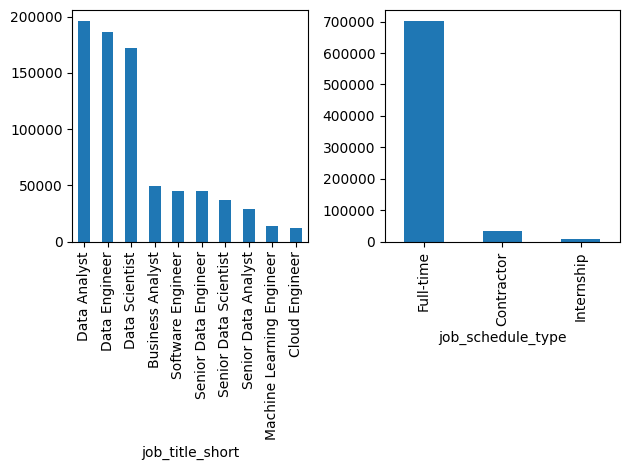

In [14]:
fig,ax = plt.subplots(1,2)
chart_1.plot(kind='bar',ax=ax[0])
chart_2.plot(kind='bar',ax=ax[1])

fig.tight_layout()          #to fix layout issue

### Example - Counting top skills in Job Postings

In [23]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skill_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skill_count = skill_count.reset_index(name='skills_count')
df_skill_count.sort_values(by='skills_count',ascending=False, inplace=True)
df_skill_count

,job_skills,job_title_short,skills_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [8]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

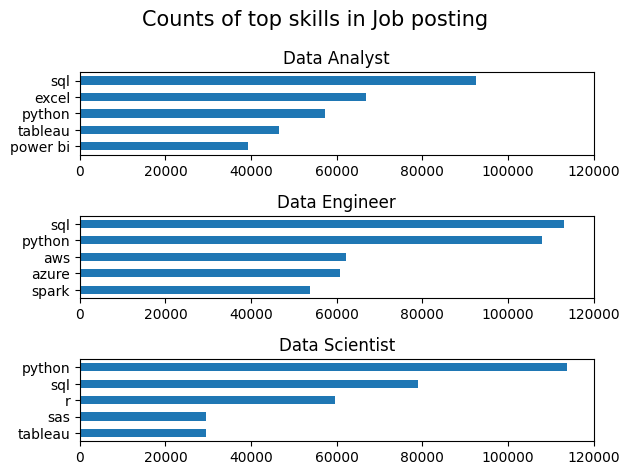

In [36]:
fig,ax =plt.subplots(3,1)

for i,job_title in enumerate(job_titles):
    df_plot = df_skill_count[df_skill_count['job_title_short'] == job_title ].head(5)
    df_plot.plot(kind= 'barh',x = 'job_skills',y = 'skills_count',title=job_title,ax=ax[i])
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)

fig.suptitle('Counts of top skills in Job posting',fontsize=15)
fig.tight_layout()